In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainSet = pd.read_csv(r'train.csv')
testSet = pd.read_csv(r'test.csv')

In [3]:
trainSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainSet.info()
print('---------------------------------------------------------')
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket    

Observations
- Age, Embarked and Cabin have some missing values
- Age's format is float

In [5]:
#drop PassengerId and Ticket since they are less useful for prediction
trainSet = trainSet.drop(["PassengerId","Ticket","Name"],axis=1)
testSet = testSet.drop(["Name","Ticket"],axis=1)

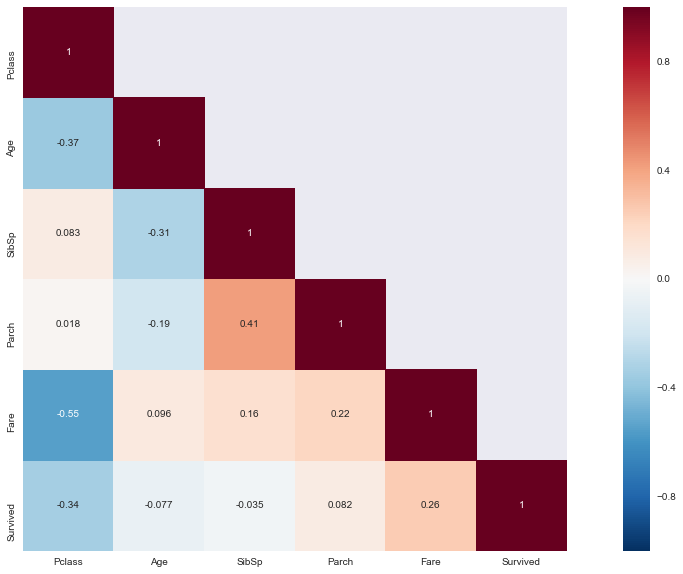

In [6]:
df1 = trainSet.drop(['Survived'],axis=1)
df1['Survived']=trainSet['Survived']
df1 = df1.corr()
mask = np.array(df1)
mask[np.tril_indices_from(mask)]=False
fig = plt.subplots(figsize=(20,10))
sns.heatmap(data=df1,mask=mask,annot=True,square=True)

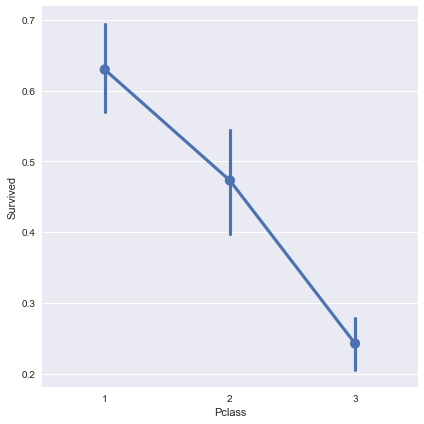

In [7]:
sns.factorplot(x='Pclass',y='Survived',data=trainSet,order=[1,2,3],size=6)

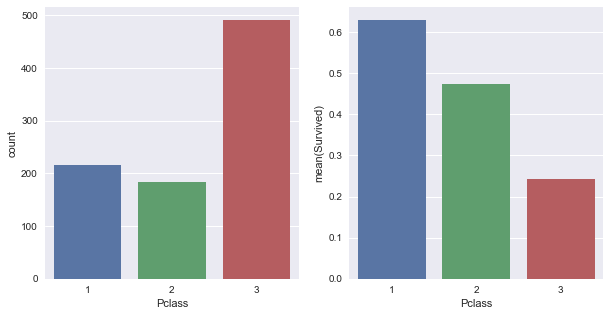

In [8]:
cls_df = trainSet[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()
plt.figure(1,(10,5))
plt.subplot(121)
sns.countplot(x="Pclass",data=trainSet)
plt.subplot(122)
sns.barplot(x="Pclass",y="Survived",data=cls_df)

In [9]:
# one-hot encoding 
dummy_columns = ['Class_1','Class_2','Class_3']
dummy_class_trainSet = pd.get_dummies(trainSet['Pclass'])
dummy_class_trainSet.columns = dummy_columns
dummy_class_testSet = pd.get_dummies(testSet['Pclass'])
dummy_class_testSet.columns = dummy_columns


trainSet = trainSet.drop(['Pclass'],axis=1)
testSet = testSet.drop(['Pclass'],axis=1)

trainSet = trainSet.join(dummy_class_trainSet)
testSet = testSet.join(dummy_class_testSet)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Class_1     891 non-null uint8
Class_2     891 non-null uint8
Class_3     891 non-null uint8
dtypes: float64(2), int64(3), object(3), uint8(3)
memory usage: 58.4+ KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Class_1        418 non-null uint8
Clas

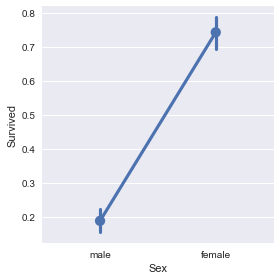

In [10]:
sns.factorplot(x='Sex',y='Survived',data=trainSet,size=4)

C:\Users\Zishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Zishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


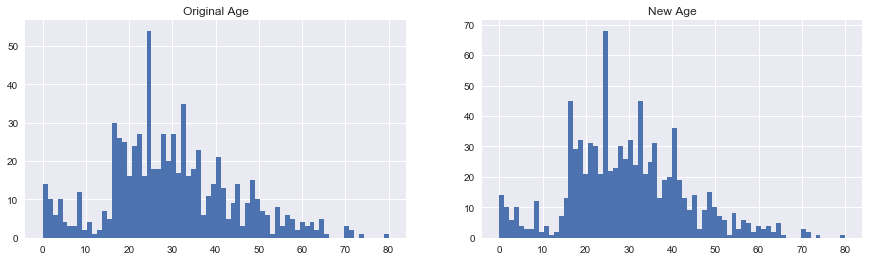

In [12]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age')
axis2.set_title('New Age')

age_std_train = trainSet['Age'].std()
age_mean_train = trainSet['Age'].mean()
size = trainSet['Age'].isnull().sum()
trainSet['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

fillvalues_train=np.random.randint(age_mean_train-age_std_train,age_mean_train+age_std_train,size=size)
trainSet['Age'][np.isnan(trainSet['Age'])] = fillvalues_train
trainSet['Age'] = trainSet['Age'].astype(int)
trainSet['Age'].hist(bins=70,ax=axis2)

age_std_test=testSet['Age'].std()
age_mean_test=testSet['Age'].mean()
size=testSet['Age'].isnull().sum()
fillvalues_test=np.random.randint(age_mean_test-age_std_test,age_mean_test+age_std_test,size=size)
testSet['Age'][np.isnan(testSet['Age'])] = fillvalues_test
testSet['Age'] = testSet['Age'].astype(int)

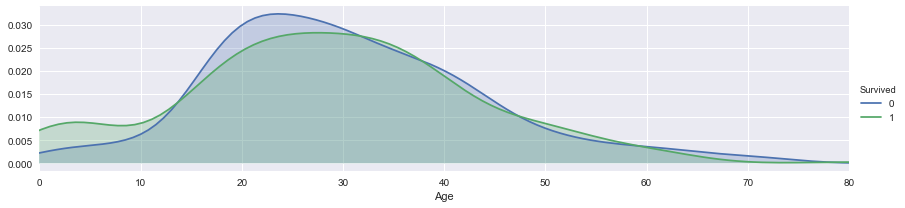

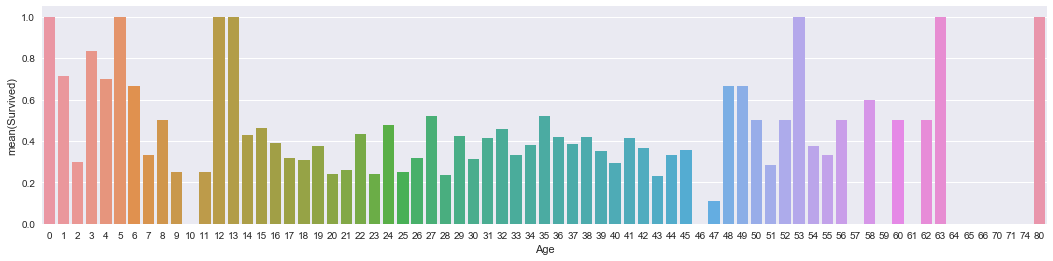

In [14]:
facet = sns.FacetGrid(trainSet,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,trainSet['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
age = trainSet[['Age','Survived']]
average_age = age.groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)

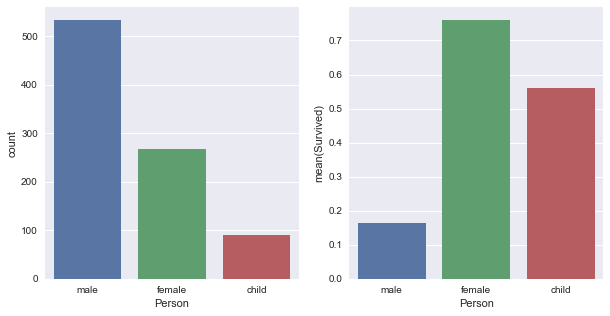

In [15]:
def get_person(person):
    age,sex = person
    return 'child' if age < 16 else sex
trainSet['Person'] = trainSet[['Age','Sex']].apply(get_person,axis=1)
testSet['Person'] = testSet[['Age','Sex']].apply(get_person,axis=1)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Person',data=trainSet,ax=axis1)
person = trainSet[['Person','Survived']].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person',y='Survived',data=person,ax=axis2,order=['male','female','child'])

In [16]:
#one-hot encoding
dummy_columns = ['Child','Female','Male']
dummy_person_train = pd.get_dummies(trainSet['Person'])
dummy_person_train.columns=dummy_columns
dummy_person_test = pd.get_dummies(testSet['Person'])
dummy_person_test.columns=dummy_columns
trainSet = trainSet.join(dummy_person_train)
testSet = testSet.join(dummy_person_test)

trainSet.drop(['Sex'],axis=1,inplace=True)
testSet.drop(['Sex'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived    891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Class_1     891 non-null uint8
Class_2     891 non-null uint8
Class_3     891 non-null uint8
Person      891 non-null object
Child       891 non-null uint8
Female      891 non-null uint8
Male        891 non-null uint8
dtypes: float64(1), int32(1), int64(3), object(3), uint8(6)
memory usage: 57.5+ KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked 

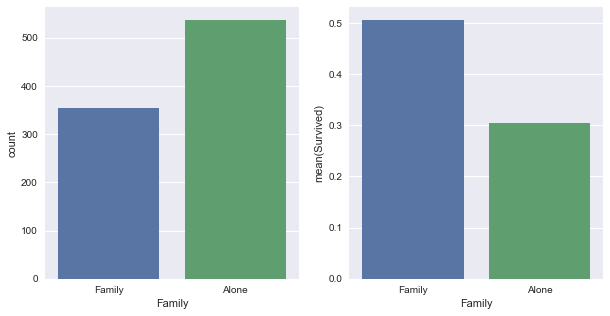

In [17]:
# 'SibSp'and'Parch'

def family(data):
    SibSp,Parch = data
    return 1 if (SibSp >0 or Parch >0) else 0

trainSet['Family'] = trainSet[['SibSp','Parch']].apply(family,axis=1)
testSet['Family'] = testSet[['SibSp','Parch']].apply(family,axis=1)
fig,(axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))                      
sns.countplot(x='Family',data=trainSet,order=[1,0],ax=axis1)
family = trainSet[['Family','Survived']].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family',y='Survived',data=family,ax=axis2,order=[1,0])
axis1.set_xticklabels(['Family','Alone'])

trainSet.drop(['SibSp','Parch'],axis=1,inplace=True)
testSet.drop(['SibSp','Parch'],axis=1,inplace=True)

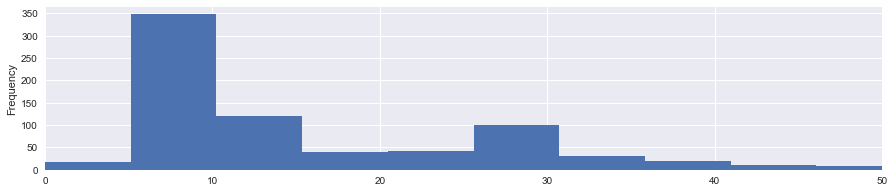

In [18]:
# fare

testSet['Fare'].fillna(testSet['Fare'].median(),inplace=True)

trainSet['Fare'] = trainSet['Fare'].astype(int)
testSet['Fare'] = testSet['Fare'].astype(int)

trainSet['Fare'].plot(kind='hist',figsize=(15,3),bins=100,xlim=(0,50))

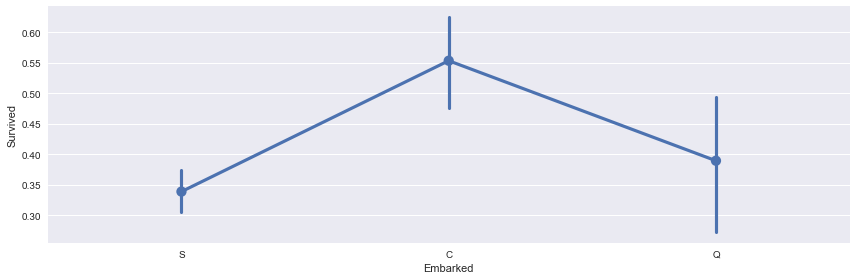

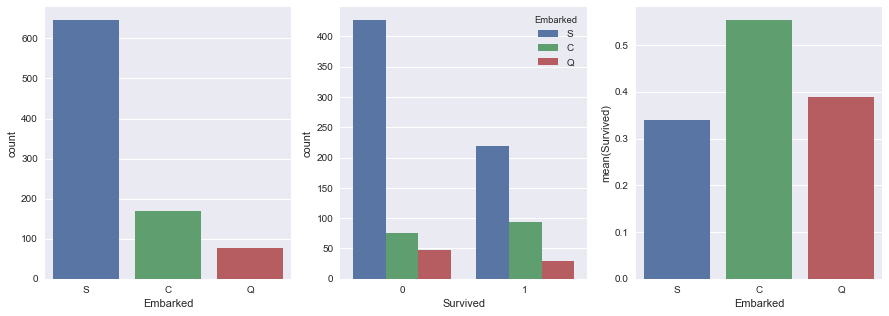

In [19]:
#embarked
trainSet['Embarked'].fillna('S',inplace=True)
sns.factorplot(x='Embarked',y='Survived',data=trainSet,size=4,aspect=3)
fig, (axis1,axis2,axis3)=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked',data=trainSet,ax=axis1)
sns.countplot(x='Survived',hue='Embarked',data=trainSet,ax=axis2)
embark=trainSet[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked',y='Survived',data=embark,ax=axis3,order=['S','C','Q'])

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
test = trainSet['Embarked']
a = LabelEncoder().fit_transform(test.values)
b = OneHotEncoder(sparse=False).fit_transform(a.reshape(-1, 1))
df_embarked = pd.DataFrame(b,columns=['C','Q','S'])
trainSet = trainSet.join(df_embarked)
trainSet.drop(['Embarked'],axis=1,inplace=True)

In [33]:
trainSet['C']=trainSet['C'].astype(int)
trainSet['S']=trainSet['S'].astype(int)
trainSet['Q']=trainSet['Q'].astype(int)
trainSet.drop(['Cabin','Person'],axis=1,inplace=True)

test = testSet['Embarked']
a = LabelEncoder().fit_transform(test.values)
b = OneHotEncoder(sparse=False).fit_transform(a.reshape(-1, 1))
df_embarked = pd.DataFrame(b,columns=['C','Q','S'])
testSet = testSet.join(df_embarked)
testSet.drop(['Embarked','Cabin','Person'],axis=1,inplace=True)
testSet['C']=testSet['C'].astype(int)
testSet['S']=testSet['S'].astype(int)
testSet['Q']=testSet['Q'].astype(int)

ValueError: labels ['Cabin' 'Person'] not contained in axis

In [53]:
from sklearn.preprocessing import StandardScaler
trainSet['Age'] = StandardScaler().fit_transform(trainSet['Age'].values.reshape(-1,1))
trainSet['Fare'] = StandardScaler().fit_transform(trainSet['Fare'].values.reshape(-1,1))

testSet['Age'] = StandardScaler().fit_transform(testSet['Age'].values.reshape(-1,1))
testSet['Fare'] = StandardScaler().fit_transform(testSet['Fare'].values.reshape(-1,1))

In [54]:
testSet.head()

,PassengerId,Age,Fare,Class_1,Class_2,Class_3,Child,Female,Male,Family,C,Q,S
0,892,0.284125,-0.504292,0,0,1,0,0,1,0,0.0,1.0,0.0
1,893,1.275098,-0.504292,0,0,1,0,1,0,1,0.0,0.0,1.0
2,894,2.418528,-0.468443,0,1,0,0,0,1,0,0.0,1.0,0.0
3,895,-0.249476,-0.486368,0,0,1,0,0,1,0,0.0,0.0,1.0
4,896,-0.630619,-0.414669,0,0,1,0,1,0,1,0.0,0.0,1.0


In [55]:
X_train = trainSet.drop('Survived',axis=1)
y_train = trainSet['Survived']
X_test = testSet.drop('PassengerId',axis=1).copy()

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred = logreg.predict(X_test)
logreg.score(X_train,y_train)

0.80920314253647585

In [96]:
svc = SVC(C=1000,gamma=0.1)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
svc.score(X_train,y_train)

0.85185185185185186

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.87317620650953987

In [60]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred = gaussian.predict(X_test)
gaussian.score(X_train, y_train)

0.77328843995510665

In [80]:
gbclf= GradientBoostingClassifier(learning_rate=1.0,max_depth=None)
gbclf.fit(X_train, y_train)
pred = gbclf.predict(X_test)
gbclf.score(X_train, y_train)

0.96857463524130194

In [83]:
bagging = BaggingClassifier(RandomForestClassifier(),max_samples=0.5, max_features=0.5)
bagging.fit(X_train,y_train)
pred = bagging.predict(X_test)
bagging.score(X_train,y_train)

0.88776655443322106

In [104]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
#print(gs.cv_results_)

0.81593714927
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
{'split0_test_score': array([ 0.75757576,  0.76767677,  0.76430976,  0.76430976,  0.76430976,
        0.77441077,  0.76430976,  0.75757576,  0.75420875,  0.75420875,
        0.77441077,  0.78787879,  0.77441077,  0.77104377,  0.77441077,
        0.77441077,  0.77777778,  0.75757576,  0.76094276,  0.75757576,
        0.78451178,  0.76767677,  0.77777778,  0.77777778,  0.77104377,
        0.76094276,  0.76767677,  0.76767677,  0.76430976,  0.76094276,
        0.76094276,  0.76767677,  0.76767677,  0.76430976,  0.76094276,
        0.76094276,  0.76767677,  0.76767677,  0.76430976,  0.76094276,
        0.75757576,  0.76430976,  0.76430976,  0.76094276,  0.76767677,
        0.78451178,  0.77777778,  0.77104377,  0.76767677,  0.76430976,
        0.79461279,  0.77777778,  0.77104377,  0.77441077,  0.77441077,
        0.79461279,  0.77777778,  0.77104377,  0.77441077,  0.77441077,
        0

In [106]:
random_forest = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
random_forest.fit(X_train,y_train)
pred = random_forest.predict(X_test)
random_forest.score(X_train,y_train)

0.89113355780022452

In [109]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['features']), 
           pd.DataFrame(random_forest.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,features,importance
7,Male,0.240227
0,Age,0.187141
1,Fare,0.186807
6,Female,0.154363
4,Class_3,0.081033
2,Class_1,0.042588
3,Class_2,0.030765
8,Family,0.021366
9,C,0.016521
5,Child,0.015827


In [110]:
coeff_df = pd.DataFrame(testSet.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,Features,Coefficient Estimate
0,Age,-0.277528
1,Fare,0.031028
2,Class_1,1.082805
3,Class_2,0.200254
4,Class_3,-1.034292
5,Child,0.440966
6,Female,1.354873
7,Male,-1.547071
8,Family,-0.236451
9,C,0.422355


In [111]:
submission = pd.DataFrame({
    'PassengerId':testSet['PassengerId'],
    'Survived':pred
})
submission.to_csv('titanic.csv',index=False)